Raw Traffic Data Cleaning

# Introduction

### About this Notebook

### Read Data

**Load libraries, data, and set notebook preferences**

In [1]:
#Import libraries
import pandas as pd
import numpy as np

import swifter 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set display options for pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 100)

pd.options.display.float_format = '{:.4f}'.format

#Set options for Matplotlib
plt.style.use('ggplot')


In [3]:
#Set path to raw data location
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\Data\01_Raw'

#Timestamp variables to parse
dates = ['Start_Time', 'End_Time', 'Weather_Timestamp']

#Read in data
df = pd.read_csv(path + '/US_Accidents_Dec19.tar.gz',parse_dates= dates, low_memory=False)

#Rename first col
df.rename(columns = {'US_Accidents_Dec19.csv': 'ID'}, inplace= True)

### Preview data

In [4]:
#Print data shape
print('Data shape: ', df.shape)

#Preview data
display(df.head())

Data shape:  (2974336, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0000,3.0000,2016-02-08 05:46:00,2016-02-08 11:00:00,39.8651,-84.0587,nan,nan,0.0100,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.,nan,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9000,nan,91.0000,29.6800,10.0000,Calm,nan,0.0200,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0000,2.0000,2016-02-08 06:07:59,2016-02-08 06:37:59,39.9281,-82.8312,nan,nan,0.0100,Accident on Brice Rd at Tussing Rd. Expect delays.,2584.0000,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9000,nan,100.0000,29.6500,10.0000,Calm,nan,0.0000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0000,2.0000,2016-02-08 06:49:27,2016-02-08 07:19:27,39.0631,-84.0326,nan,nan,0.0100,Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.,nan,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0000,33.3000,100.0000,29.6700,10.0000,SW,3.5000,nan,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0000,3.0000,2016-02-08 07:23:34,2016-02-08 07:53:34,39.7478,-84.2056,nan,nan,0.0100,Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.,nan,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1000,31.0000,96.0000,29.6400,9.0000,SW,4.6000,nan,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0000,2.0000,2016-02-08 07:39:07,2016-02-08 08:09:07,39.6278,-84.1884,nan,nan,0.0100,Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.,nan,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0000,33.3000,89.0000,29.6500,6.0000,SW,3.5000,nan,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#Check data types
print('Column data types are as follows:\n', df.dtypes)

Column data types are as follows:
 ID                               object
Source                           object
TMC                             float64
Severity                        float64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Number                          float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Wind_

# Data Cleaning

## Removing homogeneous columns and duplicate rows

In [6]:
#Get counts of unique values per column
nunique = df.swifter.apply(pd.Series.nunique)

#Assign columns with nunique ==1 to cols in order to drop
cols = nunique[nunique == 1].index.tolist()

#Drop homogeneous columns
df.drop(columns= cols, inplace = True)

#Drop duplicate rows
df.drop_duplicates(inplace=True)

C:\Users\kishe\Miniconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Missing Data

### Create Missing Data Tracker

In [7]:
#Write a function that returns the stats of missing data from df. Also capture data types to simplify cleaning
def missing_data_tracker(dataframe):
    #Capture counts and % of missing data per column and assign to missing. Index is df features
    missing = pd.DataFrame(dataframe.isna().sum(), columns= ['Count'])
    missing['%_Missing'] = missing.Count/len(dataframe)
    #Use index as a list to iterate over to capture data types of each column and append as a column in missing
    missing_index = missing.index.tolist()
    dtypes=[]
    for col in missing_index:
        dtypes.append(df[col].dtypes)
    missing['Data_Type']= dtypes
    #Filter out rows where count == 0
    missing = missing[missing['Count'] > 0].sort_values(by = 'Count', ascending = False)
    return(missing)

In [8]:
#View missing data from df
missing = missing_data_tracker(df)
display(missing)

,Count,%_Missing,Data_Type
End_Lng,2246265,0.7552,float64
End_Lat,2246265,0.7552,float64
Precipitation(in),1998359,0.6719,float64
Number,1917606,0.6447,float64
Wind_Chill(F),1852624,0.6229,float64
TMC,728072,0.2448,float64
Wind_Speed(mph),440841,0.1482,float64
Weather_Condition,65933,0.0222,object
Visibility(mi),65692,0.0221,float64
Humidity(%),59174,0.0199,float64


### Dropping Columns with Majority values missing

Will also drop TMC. TMC provides additional information about the accident, however the information provided is not as thorough as Description column.

In [9]:
#Assign columns with more of values missing + TMC to cols
cols = missing[missing['%_Missing'] > .5].index.tolist()
cols.append('TMC')

#Drop cols from df
df.drop(columns=cols, inplace=True)

#View updated missing data from df
missing = missing_data_tracker(df)
display(missing)

,Count,%_Missing,Data_Type
Wind_Speed(mph),440841,0.1482,float64
Weather_Condition,65933,0.0222,object
Visibility(mi),65692,0.0221,float64
Humidity(%),59174,0.0199,float64
Temperature(F),56064,0.0188,float64
Pressure(in),48143,0.0162,float64
Wind_Direction,45102,0.0152,object
Weather_Timestamp,36706,0.0123,datetime64[ns]
Airport_Code,5692,0.0019,object
Timezone,3164,0.0011,object


### Resolving Missing Floats

In [10]:
#View stats of missing float variables 
display(missing[missing['Data_Type'] == 'float64'])

,Count,%_Missing,Data_Type
Wind_Speed(mph),440841,0.1482,float64
Visibility(mi),65692,0.0221,float64
Humidity(%),59174,0.0199,float64
Temperature(F),56064,0.0188,float64
Pressure(in),48143,0.0162,float64
Severity,1,0.0000,float64
Start_Lat,1,0.0000,float64
Start_Lng,1,0.0000,float64
Distance(mi),1,0.0000,float64


In [11]:
#Rows missing only one value will be ffilled
fill_cols = missing[missing['Count'] == 1].index.to_list()
df[fill_cols]=df[fill_cols].ffill()

#Remaining floats will be replaced by mean values
cols = missing[missing['Data_Type'] == 'float64'].index.to_list()
df[cols]=df[cols].fillna(df[cols].mean())

In [12]:
#View updated missing data from df
missing = missing_data_tracker(df)
display(missing)

,Count,%_Missing,Data_Type
Weather_Condition,65933,0.0222,object
Wind_Direction,45102,0.0152,object
Weather_Timestamp,36706,0.0123,datetime64[ns]
Airport_Code,5692,0.0019,object
Timezone,3164,0.0011,object
Zipcode,881,0.0003,object
Sunrise_Sunset,94,0.0000,object
Civil_Twilight,94,0.0000,object
Nautical_Twilight,94,0.0000,object
Astronomical_Twilight,94,0.0000,object


### Resolving Missing Objects

#### Time-sensitive objects

We will begin by forward and backfilling time sensitive object features(rows in dataset are in chronological order). The time sensitive objects are as follows:

* Sunrise_Sunset
* Civil_Twilight
* Nautical_Twilight
* Astronomical_Twilight

In [13]:
#Assign time sensitive objects to time
time = ['Sunrise_Sunset',
        'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

#ffill and bfill time
df[time] = df[time].ffill().bfill()

#### Fill Unavailable

Next we will fill the following features with the string 'Unavailable' for missing values:
* Timezone
* Weather_Condition
* Wind_Direction
* Airport_Code
* City
* Description

In [14]:
#Assign proper columns to assign 'Unavailable to'
cols = ['Timezone','Weather_Condition', 'Wind_Direction', 'Airport_Code',
        'City', 'Description']

#Fill 
df[cols] = df[cols].fillna('Unavailable')

#### Zipcode

Finally, we will reverse engineer the Zipcode using the latitude and longitude data available

In [15]:
#Import libraries to reverse engineer zipcode
from uszipcode import SearchEngine
from uszipcode import Zipcode

#Instantiate SearchEngine
search = SearchEngine(simple_zipcode=True)

#Write function that finds zip given lat and long data
def get_zipcode(lat, lon):
    result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
    return result[0].zipcode

In [16]:
#Create a tenp df that stores Start_Lat and Start_Lng of missing Zipcode data. Will be used for get_zipcode
temp = df[df['Zipcode'].isna()][['Start_Lat', 'Start_Lng']]

#Apply get_zipcode and assign to Zipcode
temp['Zipcode']= temp.swifter.apply(lambda x: get_zipcode(x.Start_Lat, x.Start_Lng), axis =1)

C:\Users\kishe\Miniconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [17]:
#Combine temp.Zipcode onto original df. 
df.Zipcode = df.Zipcode.combine_first(temp.Zipcode)

In [18]:
#View updated missing data from df
missing = missing_data_tracker(df)
display(missing)

,Count,%_Missing,Data_Type
Weather_Timestamp,36706,0.0123,datetime64[ns]


### Resolving Missing Dates

Date column is in chronological order in data set. I will run a forward and backward fill on Weather_Timestamp to resolve and maintain the integrity of the column.

In [19]:
#ffill and backfill final column with missing values
df['Weather_Timestamp']=df['Weather_Timestamp'].ffill().bfill()

In [20]:
#Check to see all missing values in df have been resolved
missing = missing_data_tracker(df)
display(missing)

,Count,%_Missing,Data_Type


## Booleans

In [21]:
#Get counts of unique values per column
nunique = df.swifter.apply(pd.Series.nunique)

In [22]:
#Assign columns with only 2 unique values to cols
cols = nunique[nunique.values == 2].index.to_list()

#Create a dictionay of key value pairs to map 0 to False, 'False', and 'Night'
k0=[False, 'False', 'Night']
d0 = dict.fromkeys(k0,0)

#Create a dictionay of key value pairs to map 1 to True, 'True', and 'Day'
k1=[True, 'True','Day']
d1 = dict.fromkeys(k1,1)

#Aggregate dictionary together and check
d ={**d0 , **d1}
d

#Map d to cols
for col in df[cols]:
    df[col]=df[col].map(d)

## Column Specific Cleaning

### Convert Severity to categorical variables

In [23]:
#Assign written keys to numerics for crash severity
keys = {1:'One', 2:'Two', 3:'Three', 4:'Four'}

#Map new values and convert Severity to strings
df.Severity = df.Severity.map(keys).astype('str')

### Clean up Description

In [24]:
#Remove punctuation
df.Description = df.Description.str.replace('[^\w\s]','')

#Correct extra spaces
df.Description = df.Description.str.replace('\s{2,}',' ')

#Convert to lower-case
df.Description = df.Description.str.lower()

### Clean-up Timezone

In [25]:
#Remove US/
df.Timezone = df.Timezone.str.replace('^US/', '')

## Tests for covariance

#### Visualize correlation matrix with a heatmap

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

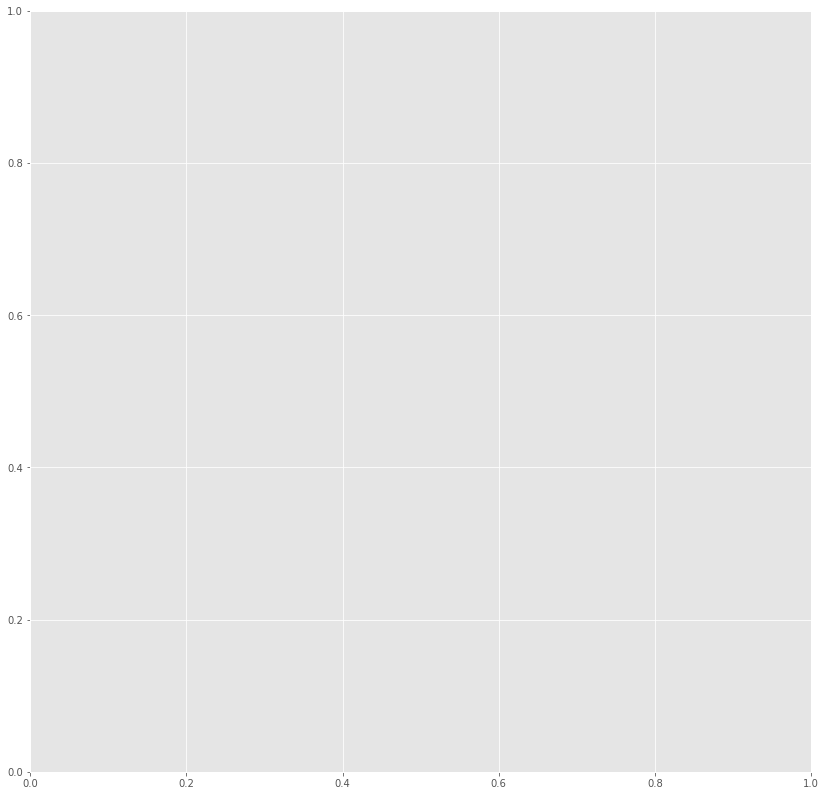

In [26]:
corr = df.corr()
pd.options.display.float_format = '{:.0f}'.format

fig, ax = plt.subplots(figsize = (14,14))


#plot data
g = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0, 
    annot=True, fmt='.2f',linewidths = .25,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax,
    cbar_kws={"shrink": .82})

#Set plot aesthetics
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Will be keeping all features at this time.

## Outlier Removal.... Might not be necessary

### General Statistics about the data

In [27]:
#Capture quantitative variables
qvariables = df.select_dtypes('float64')

#Create empty df to store statistics of qvariables
stats=pd.DataFrame()

#Capture metrics of qvariables and assign to stats. 
stats["Min"]=qvariables.min()
stats["Max"]=qvariables.max()
stats["Avg"]=qvariables.mean()
stats["SD"]=qvariables.std()
stats["Var"]=qvariables.var()

#Transpose for easier reading
stats=stats.T

#View qvariables stats
display(stats)

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Min,25,-125,0,-78,1,0,0,0
Max,49,-67,334,171,100,33,140,823
Avg,36,-95,0,62,65,30,9,8
SD,5,17,2,19,22,1,3,5
Var,24,296,2,346,499,1,8,22


#### Data Distributions 

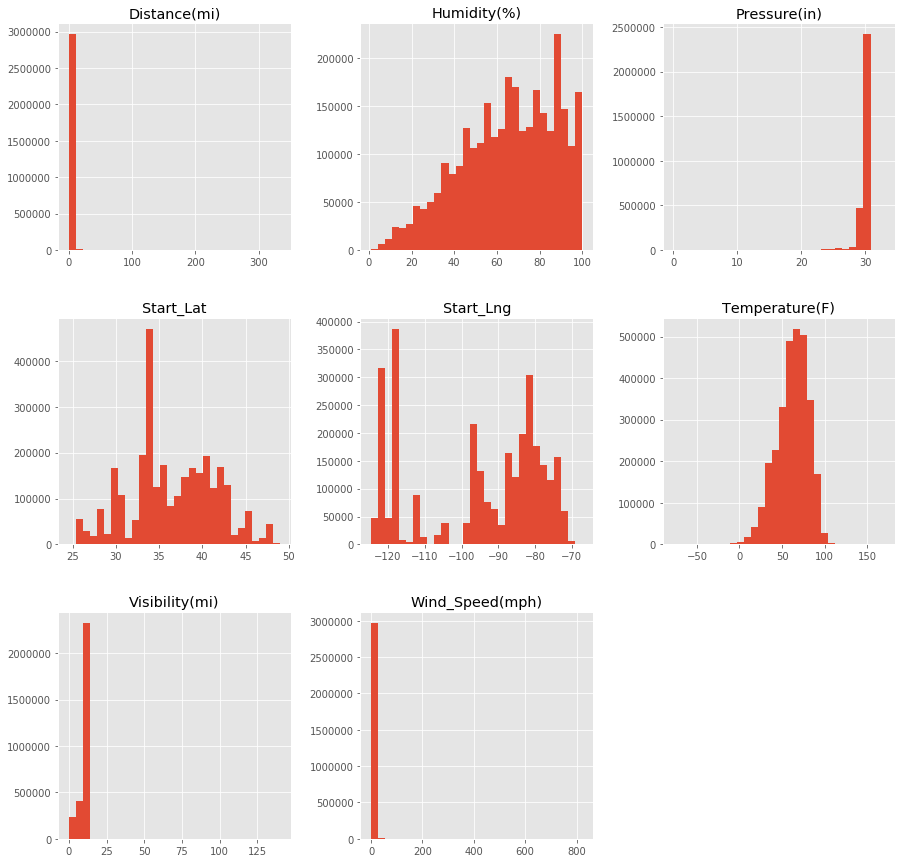

In [28]:
#Plot data distributions of continuos variables
df.select_dtypes('float64').hist(bins = 30, figsize = (15,15));

Outliers appear to exist in the following:
* Distance(mi)
* Pressure(in)
* Visibility(mi)
* Wind_Speed(mph)

In [29]:
#Write a function that calculates a feature's IQR and removes outliers
def outlier_remover(df, feature):
    q1= np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    IQR = q3 - q1 #Interquantile range
    lower = q1 - (IQR * 1.5)
    upper = q3 + (IQR * 1.5)
    new_df =  df.loc[(df[feature] > lower) & (df[feature] < upper)]
    return new_df

## Extracting time data from Start_Time and End_Time

In [30]:
#Extract day, month, year, time information from Start_Time
df['Start_Weekday'] = df['Start_Time'].dt.day_name()
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Year'] = df['Start_Time'].dt.year

#Extract day, month, year, time information from End_Time
df['End_Weekday'] = df['End_Time'].dt.day_name()
df['End_Day'] = df['End_Time'].dt.day
df['End_Month'] = df['End_Time'].dt.month
df['End_Year'] = df['End_Time'].dt.year

#Check
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Weekday,Start_Day,Start_Month,Start_Year,End_Weekday,End_Day,End_Month,End_Year
0,A-1,MapQuest,Three,2016-02-08 05:46:00,2016-02-08 11:00:00,40,-84,0,right lane blocked due to accident on i70 eastbound at exit 41 oh235 state route 4,I-70 E,R,Dayton,Montgomery,OH,45424,Eastern,KFFO,2016-02-08 05:58:00,37,91,30,10,Calm,8,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Monday,8,2,2016,Monday,8,2,2016
1,A-2,MapQuest,Two,2016-02-08 06:07:59,2016-02-08 06:37:59,40,-83,0,accident on brice rd at tussing rd expect delays,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,Eastern,KCMH,2016-02-08 05:51:00,38,100,30,10,Calm,8,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Monday,8,2,2016,Monday,8,2,2016
2,A-3,MapQuest,Two,2016-02-08 06:49:27,2016-02-08 07:19:27,39,-84,0,accident on oh32 state route 32 westbound at dela palma rd expect delays,State Route 32,R,Williamsburg,Clermont,OH,45176,Eastern,KI69,2016-02-08 06:56:00,36,100,30,10,SW,4,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,Monday,8,2,2016,Monday,8,2,2016


# Write cleaned file to CSV

In [31]:
#Set path to write file
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\Data\02_Intermediate'

#Write to csv
df.to_csv(path + '/2020_0126_Traffic_Raw_Data_Cleaned.csv')